# Modeling Complex Systems Final Project
## Mish Wilson and Cooper Sullivan
11/27/2024

In [8]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import math

In [96]:
# Creating intial random networks
social_net = nx.Graph()

# Create 'n' number of nodes all starting out alive
n = 10
init_nodes = [(i, dict(status="alive")) for i in range(n)]
# print(init_nodes)

# Choose 1 node randomly to be the imposter and set its status to reflect this
imposter_idx = random.choice(range(0, len(init_nodes)))
init_nodes[imposter_idx][1]["status"] = "imposter"
# print(init_nodes[imposter_idx])

# Add all these nodes to our network graph
social_net.add_nodes_from(init_nodes)


# Create edges for each. All start at trust = 100% and arbitrary equal distance
init_edges = []
sus_edges = []
for i in range(0, len(init_nodes)):
    for j in range(0, len(init_nodes)):

        # Check to ensure nodes are different to avoid self edges
        if i != j:

            # Imposter node keeps track of edges seperately for formatting
            if i == imposter_idx:
                sus_edges.append((i, j, dict(trust=1, distance=10)))
            else:
                init_edges.append((i, j, dict(trust=1, distance=10)))


# Add these edges to network
social_net.add_edges_from(init_edges)
social_net.add_edges_from(sus_edges)

In [115]:
# Function to display network
def draw_network():

    pos = nx.spring_layout(social_net)

    for i in social_net.nodes:

        nx.draw_networkx_edges(social_net, pos=pos, edgelist=init_edges, edge_color="tab:blue", alpha=0.5)
        nx.draw_networkx_edges(social_net, pos=pos, edgelist=sus_edges, edge_color="tab:red", alpha=1)
        
        if nx.get_node_attributes(social_net, "status")[i] == "imposter":
            
            nx.draw_networkx_nodes(social_net, pos=pos, nodelist=[i], node_color="tab:red")
        
        else:
            nx.draw_networkx_nodes(social_net, pos=pos, nodelist=[i], node_color="tab:blue")

        labels = nx.draw_networkx_labels(social_net, pos=pos)

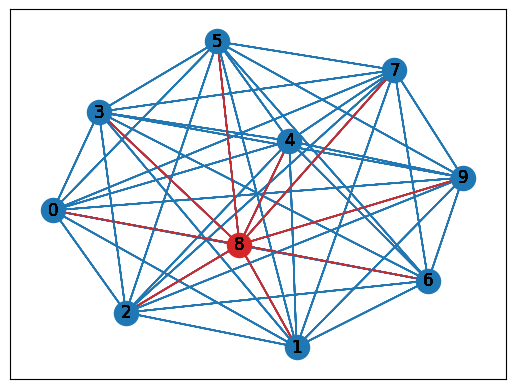

In [116]:
draw_network()

In [ ]:
# Driver code for our system.